## CA1: Part (ii): Cluster — Life Expectancy Data

**Course:** HDip in Data Analytics

**Lecturer:** Muhammad Iqbal

**Module:** Machine Learning for Business  

# Are there country profiles (clusters) with distinct health and public spending patterns?

### Project Objective
The objective of this project is to identify country profiles with distinct health and public spending patterns through the application of clustering techniques. Using a dataset that includes socio-economic and health-related indicators such as *Life expectancy, Adult mortality, Alcohol consumption, Health expenditure, GDP, Population, Education level, and Infectious disease coverage (Hepatitis B, Polio, Diphtheria), the goal is to uncover groups of countries that share similar characteristics.

The clustering will be performee by K-Means and Hierarchical, preceded by PCA to reduce dimensionality and improve interpretability of the cluster structures. Through analysis of clustering solution and  using the Silhouette Score and Davies–Bouldin Index, It will be possible a quantitative comparison of algorithm performance.

The insights generated can help understand how economic and social factors align with population health outcomes globally.

### Data Dictionary
**Country** Name of the country observed

**Year** Year of data record

**Status** Country classification according to World Bank criteria 

**Life expectancy** Average number of years a newborn is expected to live under current mortality conditions

**Adult Mortality** Probability of dying between ages 15 and 60 years per 1,000 population 

**infant deaths** Number of infant deaths (under 1 year of age) per 1,000 live births

**Alcohol** Estimated average alcohol consumption (in litres of pure alcohol per capita, age 15+)

**percentage expenditure** Health expenditure as a percentage of Gross Domestic Product 

**Hepatitis B** Immunization coverage for Hepatitis B 

**Measles** Number of reported cases of Measles per 1,000 population

**BMI** Average Body Mass Index of the population (kg/m²)

**under-five deaths** Number of deaths of children under five years of age 

**Polio** Immunization coverage for Polio 

**Total expenditure** Total government expenditure on health as a percentage of total government expenditure

**Diphtheria** Immunization coverage for Diphtheria, Pertussis and Tetanus 

**HIV/AIDS** Deaths per 1,000 live births due to HIV/AIDS among children under 5 years old

**GDP** Gross Domestic Product per capita

**Population** Total population of the country for the corresponding year

**thinness 1-19 years** Prevalence of thinness among individuals aged 10 to 19 years (%)

**thinness 5-9 years** Prevalence of thinness among individuals aged 5 to 9 years (%)

**Income composition of resources** Index reflecting human development based on income (0–1 scale, higher = better)

**Schooling** Average number of years of schooling expected for children

In [5]:
# Import Libraries & Load Dataset

In [7]:
import warnings
warnings.filterwarnings('ignore') # I can suppress the warnings

In [9]:
import pandas as pd # Read, organize, and analyze the dataset

# Loaded the data into df dataframe
df = pd.read_csv("Life Expectancy Data.csv")

# Display first 5 records
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Number of rows and columns
df.shape

(2938, 22)

In [13]:
# Dataset overview 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
# Descriptive statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
# Total missing values in the dataset
df.isnull().sum().sum()

2563

In [19]:
# Total missing values in the dataset by columns 
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
# Total missing values in the dataset by percentage 
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [23]:
# Duplicate records
df.duplicated().sum()

0

In [25]:
# Remove columns that will not be used
drop_cols = ['Life expectancy ','Country','Year','Status',
    'infant deaths','Measles','Population','percentage expenditure',
    'thinness 5-9 years', 'thinness  1-19 years']

use_df = df.drop(columns=drop_cols, errors='ignore').copy()

In [27]:
# Total missing values in the dataset by columns after drop some of them 
use_df.isnull().sum()

Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [29]:
import numpy as np # used for numerical calculations and array manipulation

# Columns where the value 0 means "missing" in the dataset
zero_as_missing = ['Alcohol','Hepatitis B','Polio','Diphtheria',
                   'BMI','Total expenditure','GDP','HIV/AIDS']

# Filter only the columns that exist in the dataset
cols_zero = [c for c in zero_as_missing if c in use_df.columns]
if cols_zero:
    use_df[cols_zero] = use_df[cols_zero].replace(0, np.nan)

# Treat zeros as missing data
# In this dataset, some fields use `0` to indicate that the value is missing
# I replaced these zeros with `NaN` so that pandas and the cleaning/imputation routines correctly treat them as missing values

In [31]:
# Columns to impute with the median
cols_to_impute = ['Alcohol','Hepatitis B','Polio','Diphtheria',
    'BMI','Total expenditure','GDP','HIV/AIDS']
cols_to_impute = [c for c in cols_to_impute if c in use_df.columns]

# Select only numeric columns
num_cols = use_df.select_dtypes(include=[np.number]).columns

# Fill NaNs with the median for each numeric column
for c in num_cols:
    use_df[c].fillna(use_df[c].median(), inplace=True)

In [33]:
# Double check If It worked well 
use_df.isnull().sum() 

Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [35]:
# Limit extreme values with clipping, only in numeric columns
def iqr_clip(df, k=3.0):
    out = use_df.copy()
    num_cols = out.select_dtypes(include='number').columns.tolist()
    for col in num_cols:
        if out[col].dropna().empty:
            continue
        q1, q3 = np.nanpercentile(out[col], [25, 75])
        iqr = q3 - q1
        low, high = q1 - k * iqr, q3 + k * iqr
        out[col] = np.clip(out[col], low, high)
    return out 

In [37]:
# Limit outliers in numeric columns
use_df_clip = iqr_clip(use_df, k=3.0)

In [39]:
# Comparing before and later clipping
use_df.describe().T[['min','max']].head(10)
use_df_clip.describe().T[['min','max']].head(10)

# I applied a soft outlier pruning using IQR (k=3).
# The goal was to prevent a few extreme values from distorting the K-Means/Hierarchical distances

,min,max
Adult Mortality,1.00,686.00
Alcohol,0.01,17.87
Hepatitis B,40.00,99.00
Measles,0.00,1441.00
BMI,1.00,87.30
under-five deaths,0.00,112.00
Polio,21.00,99.00
Total expenditure,0.37,16.21
Diphtheria,21.00,99.00
HIV/AIDS,0.10,2.90


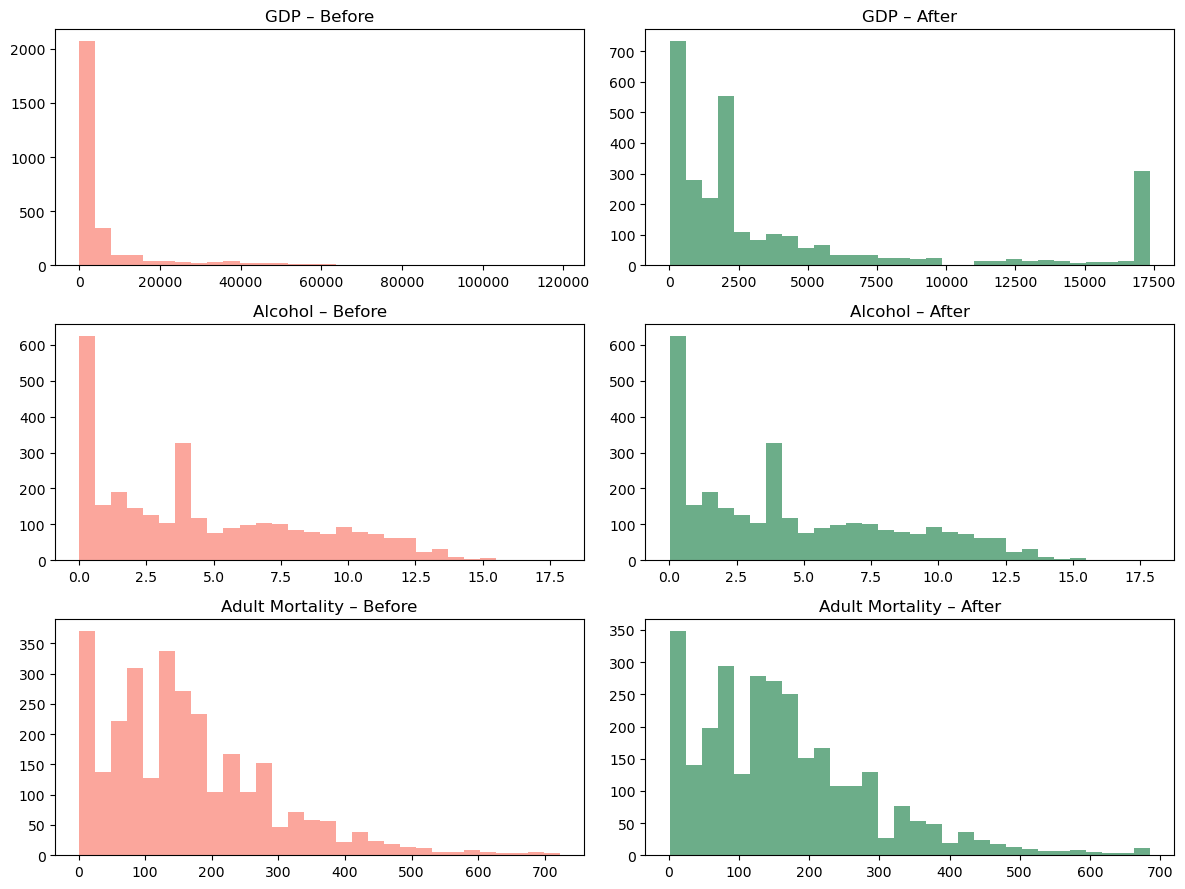

In [41]:
import matplotlib.pyplot as plt # used for creating visualizations and plots

# Visualization: Before x After clip
cols_to_plot = ['GDP','Alcohol','Adult Mortality','BMI']
cols_to_plot = [c for c in cols_to_plot if c in use_df_clip.columns]

plt.figure(figsize=(12, 3*len(cols_to_plot)))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 2, 2*i-1)
    plt.hist(use_df[col], bins=30, color='salmon', alpha=0.7)
    plt.title(f"{col} – Before")
    
    plt.subplot(len(cols_to_plot), 2, 2*i)
    plt.hist(use_df_clip[col], bins=30, color='seagreen', alpha=0.7)
    plt.title(f"{col} – After")

plt.tight_layout()
plt.show()

In [43]:
# Standardize (mean=0, std=1) data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(use_df_clip)